In [1]:
# Load libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.feature_selection import VarianceThreshold

sns.set_theme(style="ticks",color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [2]:
#import dataset
df=pd.read_csv('Ionosphere.csv')


In [3]:
# view dataset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [4]:
# shape
print("shape of sonar dataset",df.shape)


shape of sonar dataset (351, 35)


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      351 non-null    int64  
 1   V2      351 non-null    int64  
 2   V3      351 non-null    float64
 3   V4      351 non-null    float64
 4   V5      351 non-null    float64
 5   V6      351 non-null    float64
 6   V7      351 non-null    float64
 7   V8      351 non-null    float64
 8   V9      351 non-null    float64
 9   V10     351 non-null    float64
 10  V11     351 non-null    float64
 11  V12     351 non-null    float64
 12  V13     351 non-null    float64
 13  V14     351 non-null    float64
 14  V15     351 non-null    float64
 15  V16     351 non-null    float64
 16  V17     351 non-null    float64
 17  V18     351 non-null    float64
 18  V19     351 non-null    float64
 19  V20     351 non-null    float64
 20  V21     351 non-null    float64
 21  V22     351 non-null    float64
 22  V2

In [6]:
# descriptions, change precision to 3 places
set_option('precision', 3)
df.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
count,351.000,351.0,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,...,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000,351.000
mean,0.892,0.0,0.641,0.044,0.601,0.116,0.550,0.119,0.512,0.181,...,0.396,-0.071,0.542,-0.070,0.378,-0.028,0.353,-0.004,0.349,0.014
std,0.311,0.0,0.498,0.441,0.520,0.461,0.493,0.521,0.507,0.484,...,0.578,0.508,0.516,0.550,0.576,0.508,0.571,0.514,0.523,0.468
min,0.000,0.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
25%,1.000,0.0,0.472,-0.065,0.413,-0.025,0.211,-0.055,0.087,-0.048,...,0.000,-0.332,0.286,-0.443,0.000,-0.237,0.000,-0.243,0.000,-0.165
50%,1.000,0.0,0.871,0.016,0.809,0.023,0.729,0.015,0.684,0.018,...,0.554,-0.015,0.708,-0.018,0.497,0.000,0.443,0.000,0.410,0.000
75%,1.000,0.0,1.000,0.194,1.000,0.335,0.969,0.446,0.953,0.534,...,0.905,0.157,1.000,0.154,0.883,0.154,0.858,0.200,0.814,0.172
max,1.000,0.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [7]:
# descriptions, change precision to 3 places
set_option('precision', 3)
df.describe(include="object")


,Class
count,351
unique,2
top,good
freq,225


In [8]:
# class distribution
print(df.groupby('Class').size())

Class
bad     126
good    225
dtype: int64


In [9]:
# class distribution
print(df.groupby('Class').size()/len(df))

Class
bad     0.359
good    0.641
dtype: float64


AxesSubplot(0.260833,0.125;0.503333x0.755)


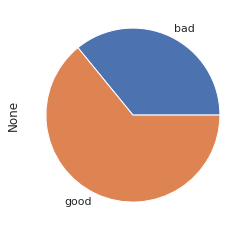

In [10]:
# class distribution
print(df.groupby('Class').size().plot.pie())

# FEATURE ENGINEERING

In [11]:
# CHECKING OF MISSING VALUES
print("Total missing values of each columns")
print(df.isnull().sum())
print(" ")
print("Total missing values is:")
print(df.isnull().any().sum())
print(" ")
print("missing values(True or False)")
print(df.isnull().any())

Total missing values of each columns
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64
 
Total missing values is:
0
 
missing values(True or False)
V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
V29      False
V30      False
V31      False
V32      False
V33      False
V34      

In [12]:
# summarize the number of unique values in each column
print(df.nunique())

V1         2
V2         1
V3       219
V4       269
V5       204
V6       259
V7       231
V8       260
V9       244
V10      267
V11      246
V12      269
V13      238
V14      266
V15      234
V16      270
V17      254
V18      280
V19      254
V20      266
V21      248
V22      265
V23      248
V24      264
V25      256
V26      273
V27      256
V28      281
V29      244
V30      266
V31      243
V32      263
V33      245
V34      263
Class      2
dtype: int64


In [13]:
#drop Nunique columns
df.drop("V2",axis=1,inplace=True)

In [14]:
# locate rows of duplicate data
df.duplicated().any()

True

In [15]:
#drop duplicated values
df=df.drop_duplicates()

Visualization before preprocessing

In [16]:
#encode the target
df['Class']=df['Class'].map({'bad':1.0,'good':0.0})


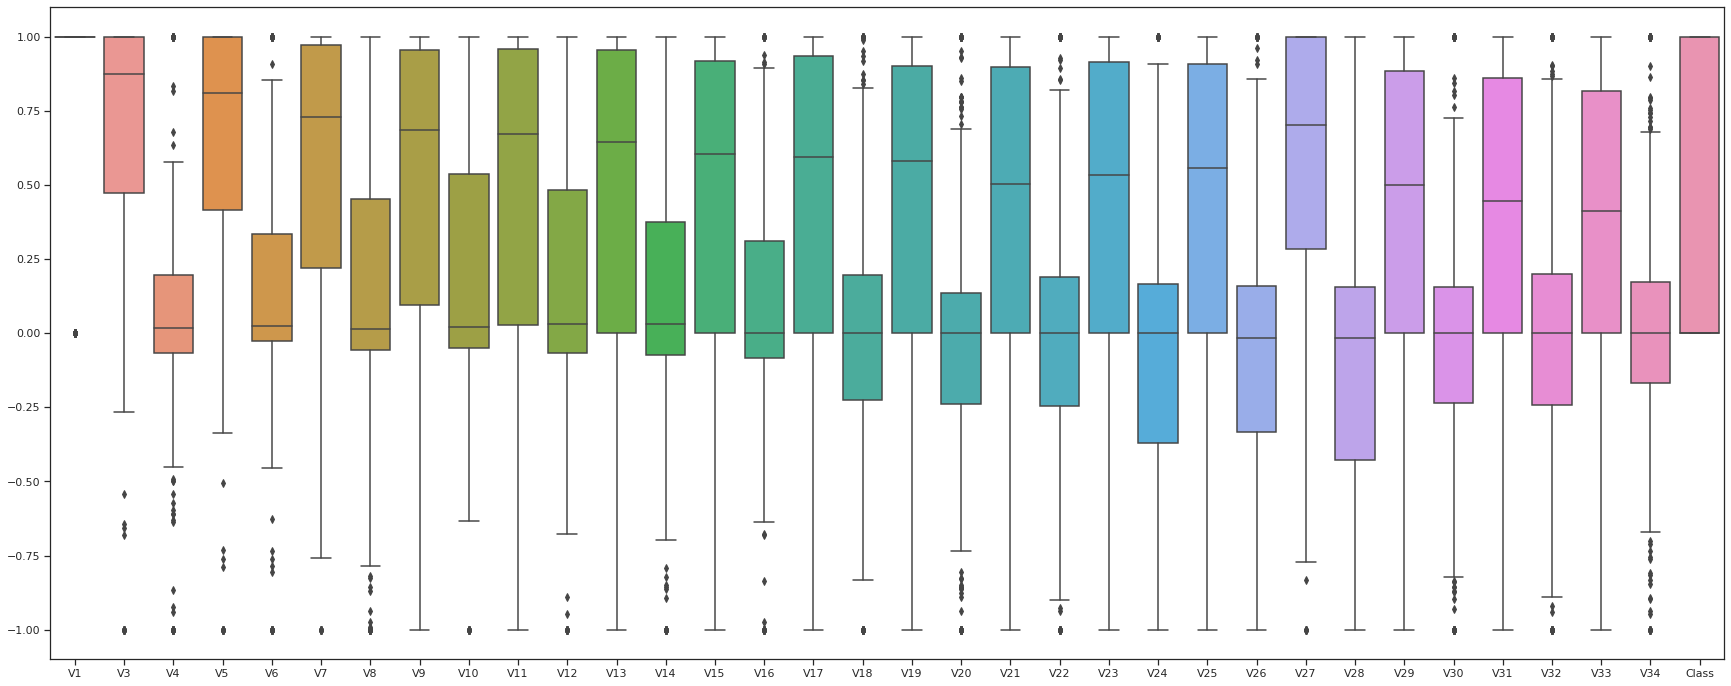

In [17]:
# boxplot
boxplot=df.copy()
cols=list(boxplot.columns)
plt.figure(figsize=(30,12))
sns.boxplot(data=boxplot)

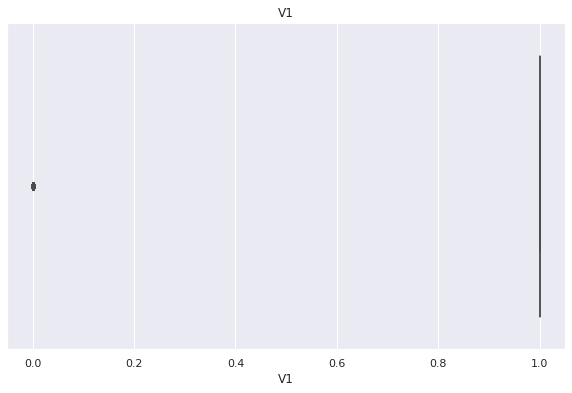

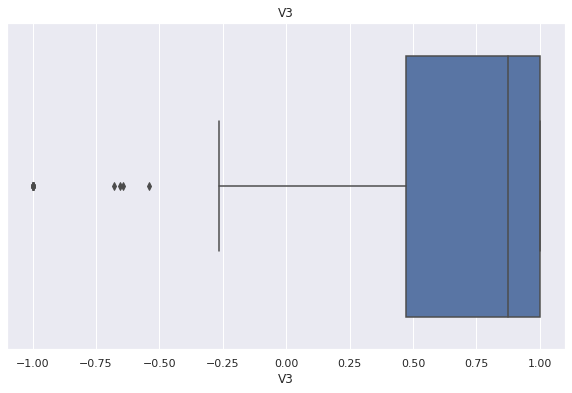

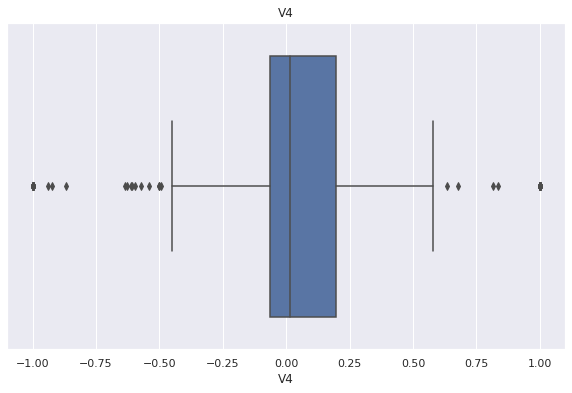

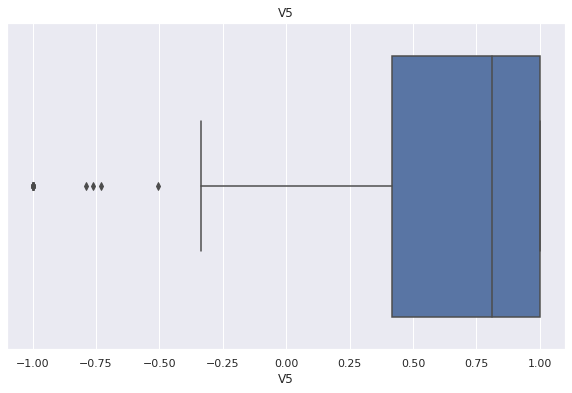

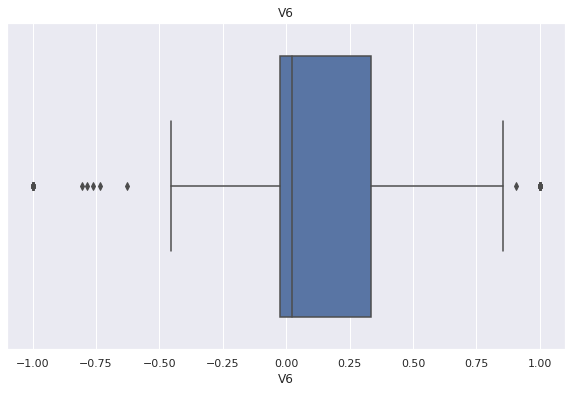

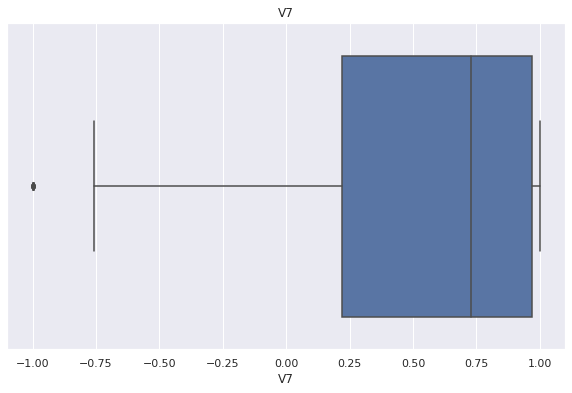

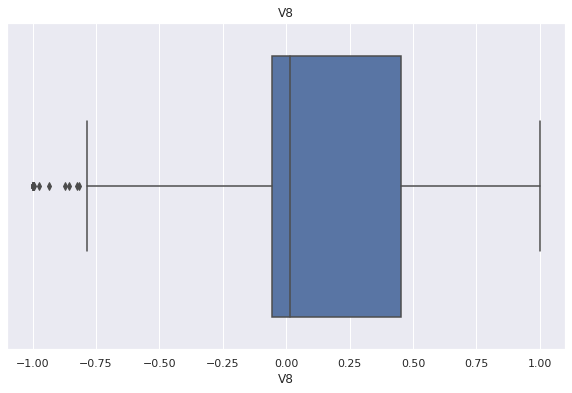

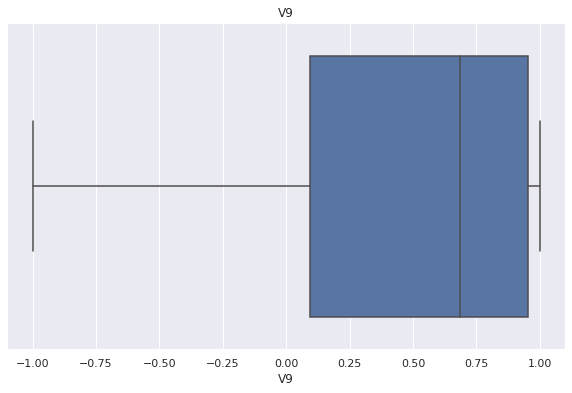

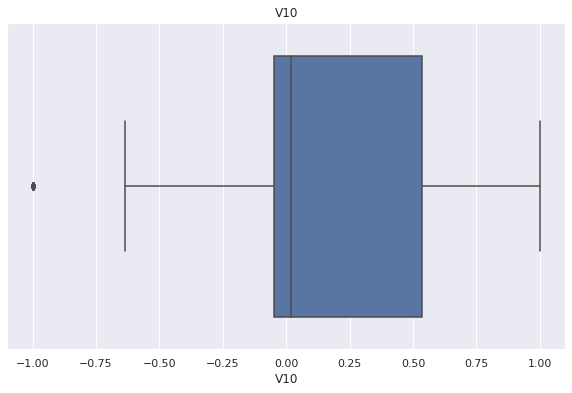

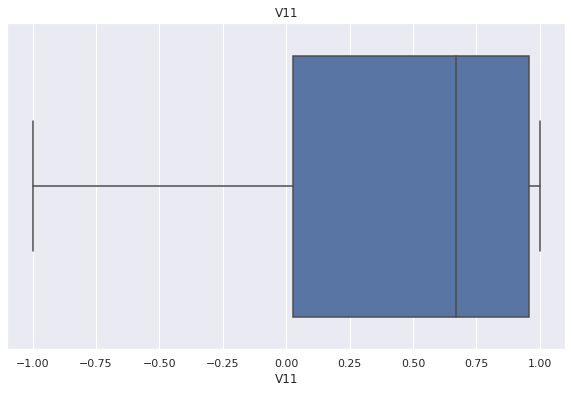

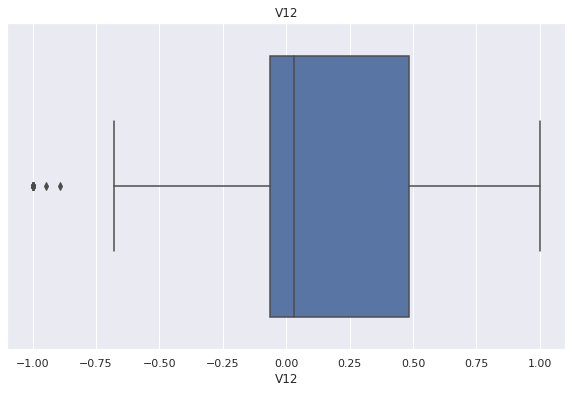

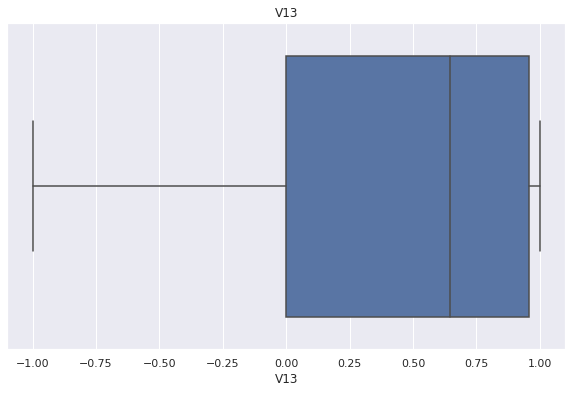

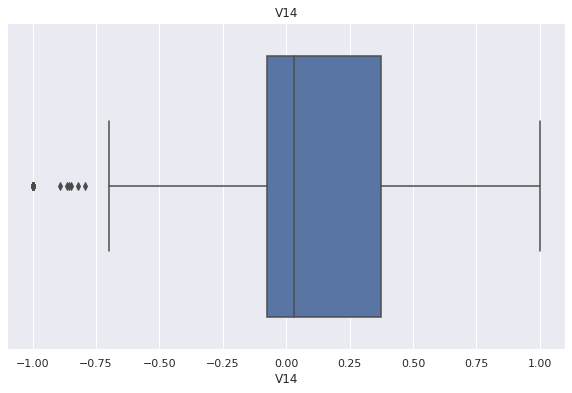

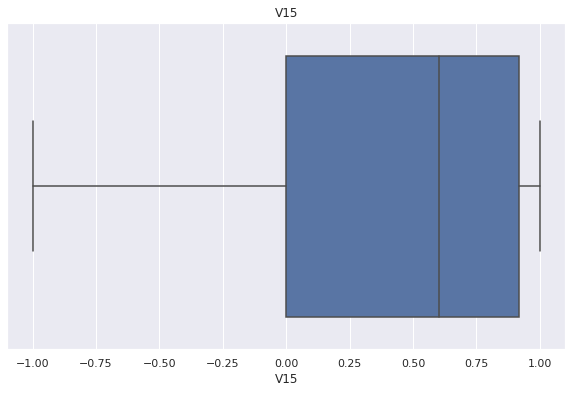

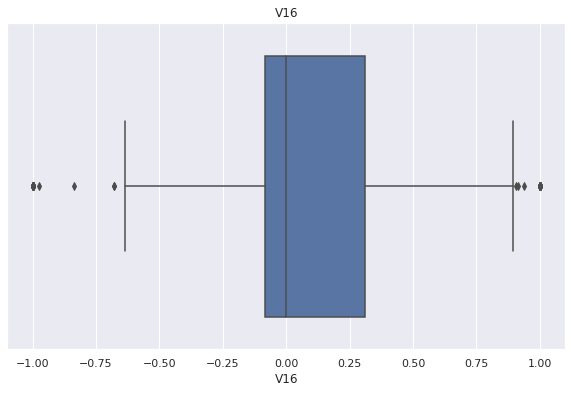

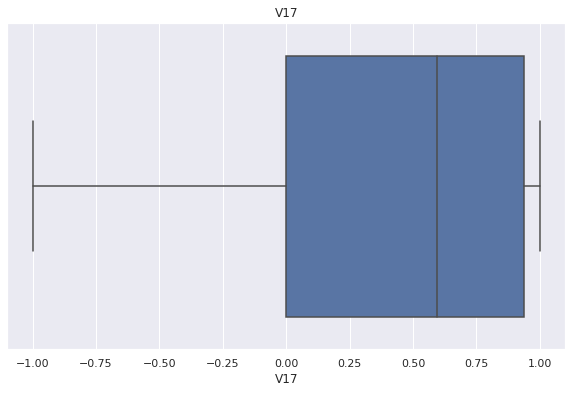

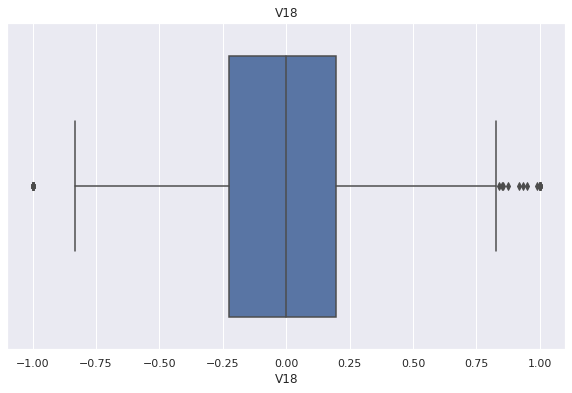

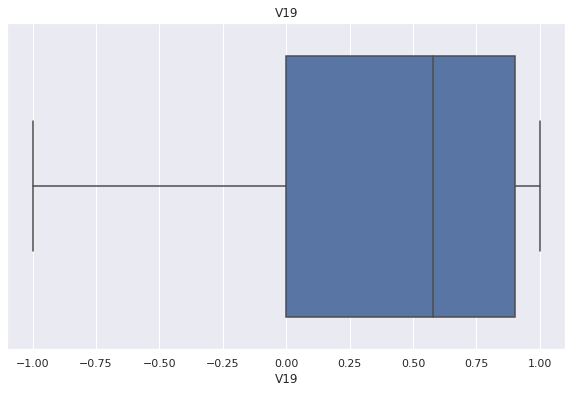

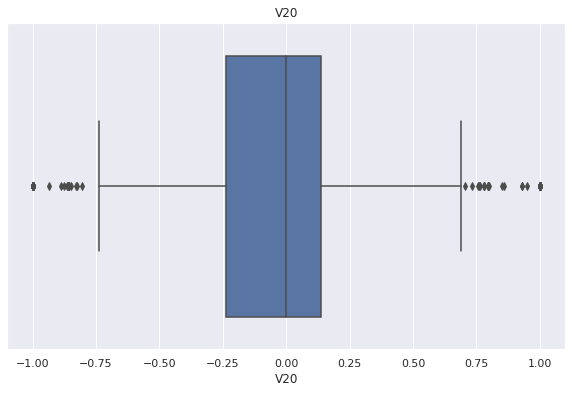

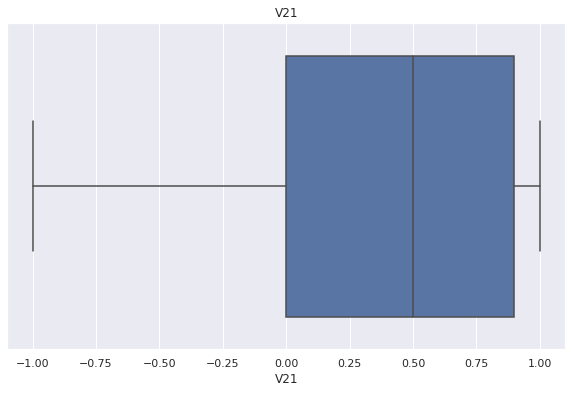

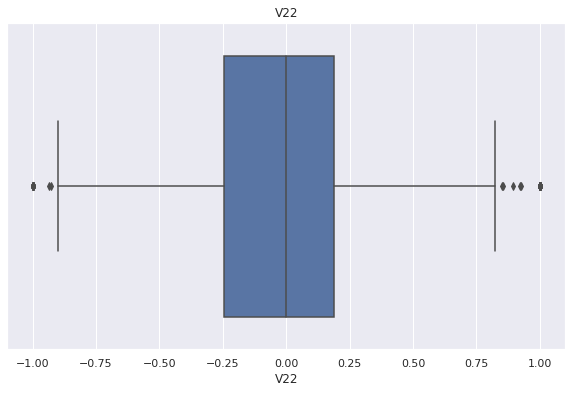

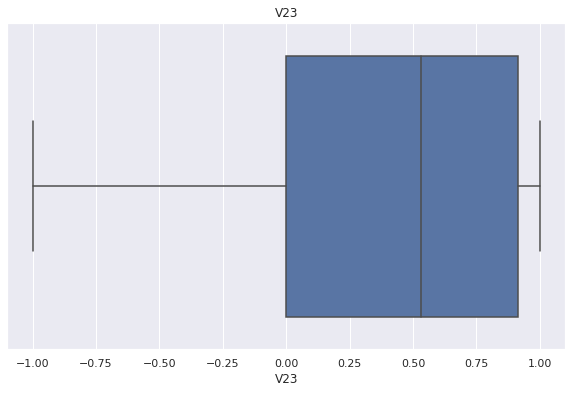

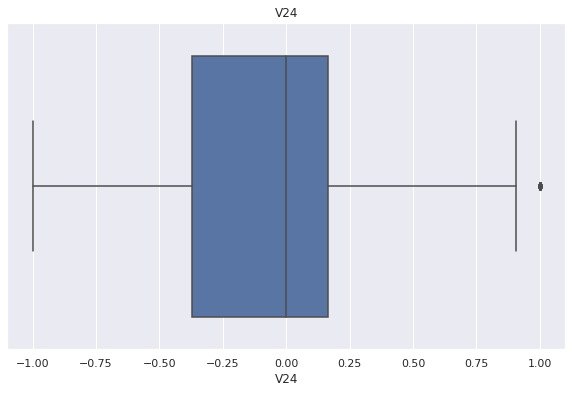

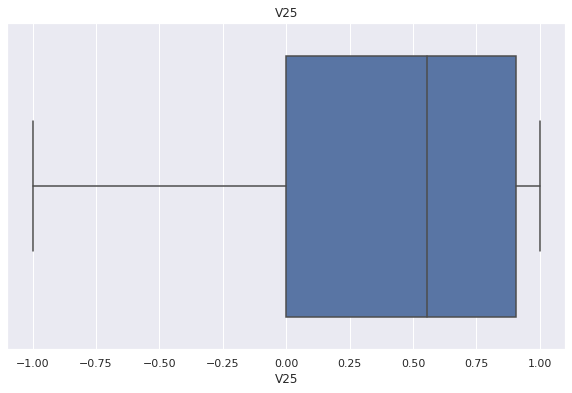

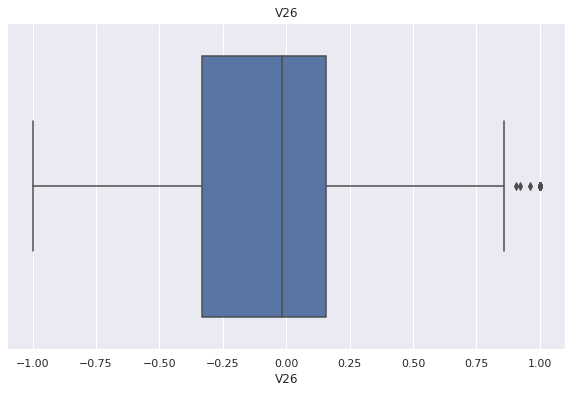

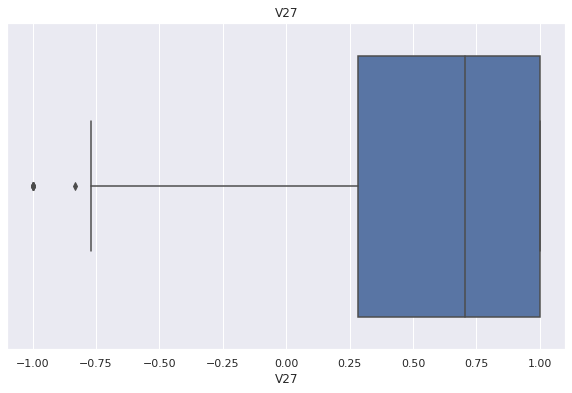

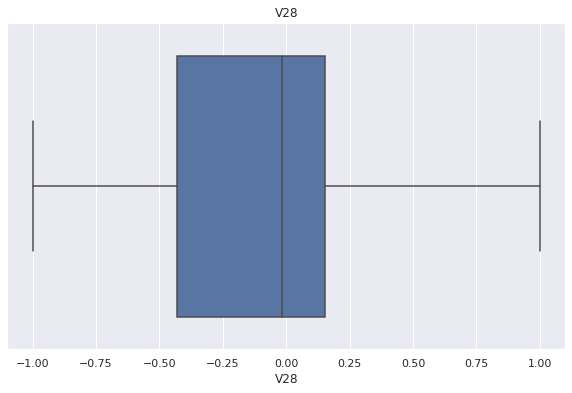

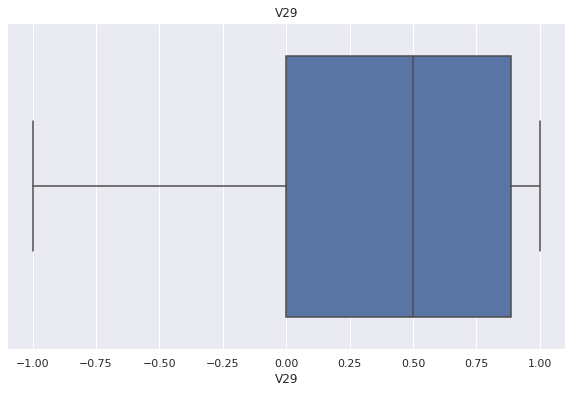

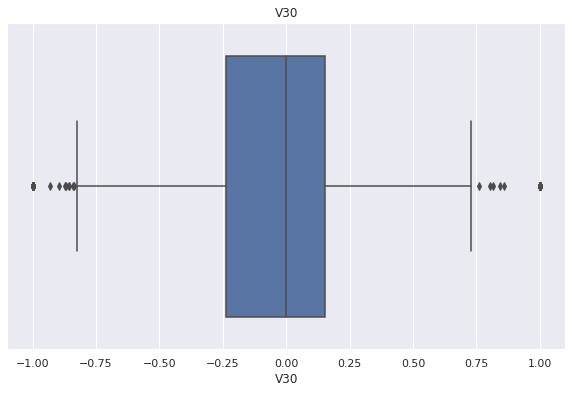

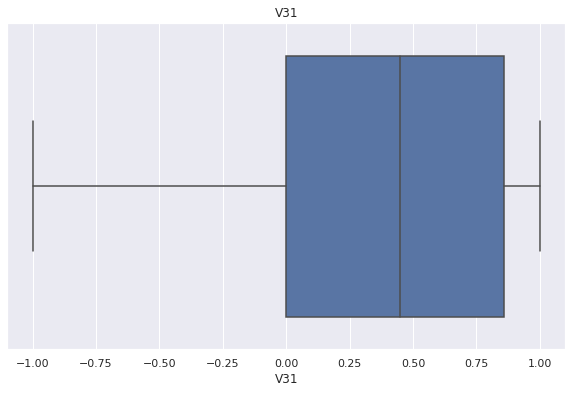

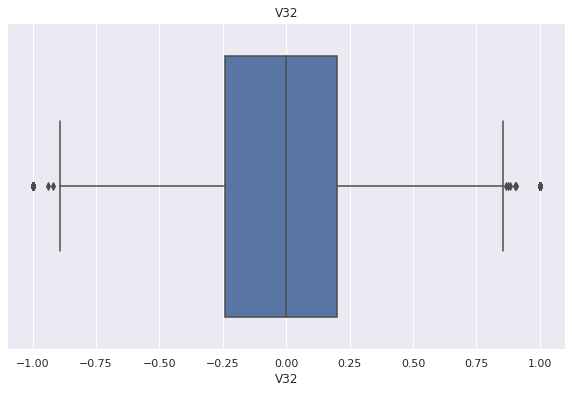

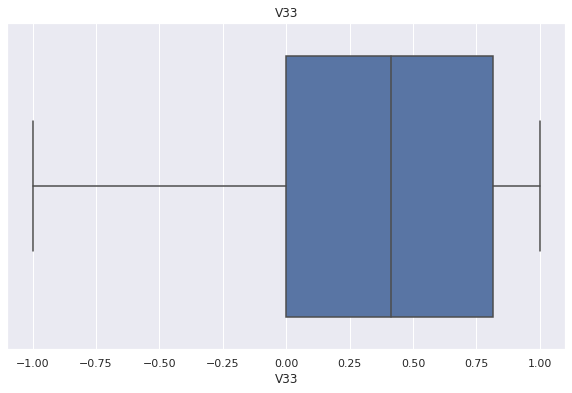

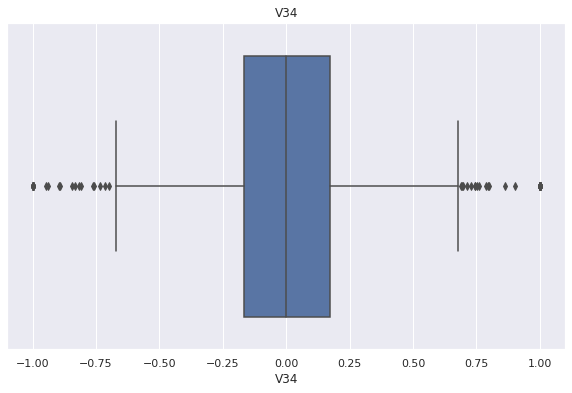

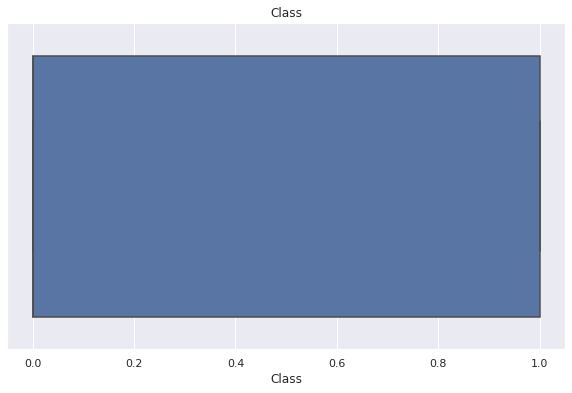

In [18]:
#Boxplot for checking of outliers
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.boxplot(boxplot[col])
    plt.title(col)
    plt.show()

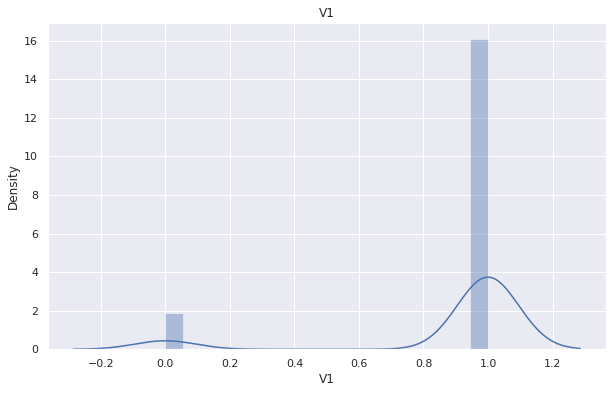

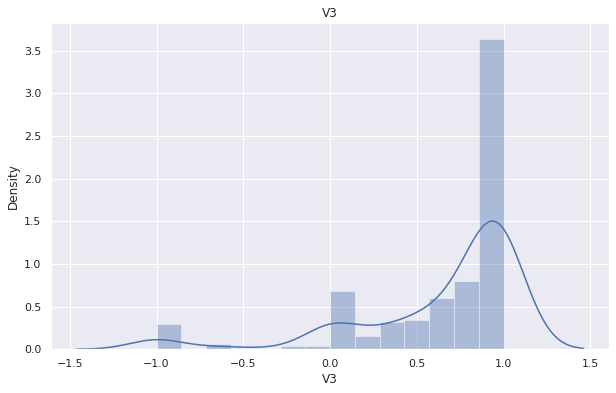

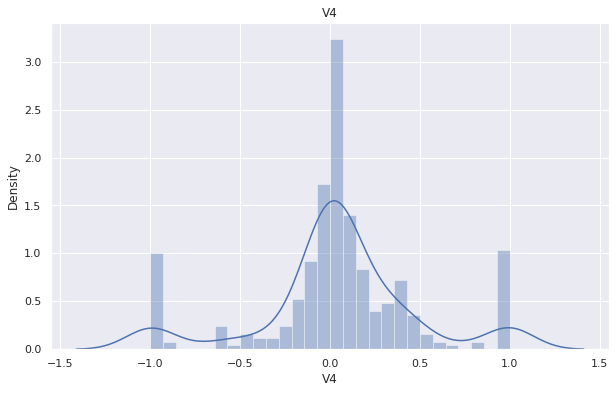

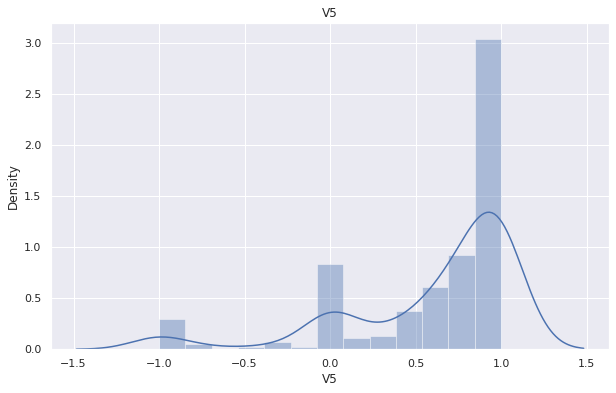

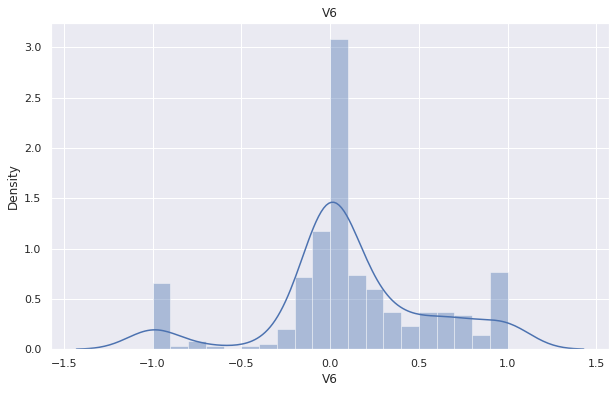

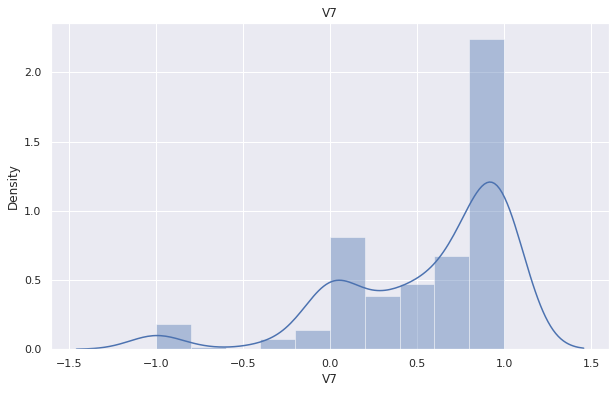

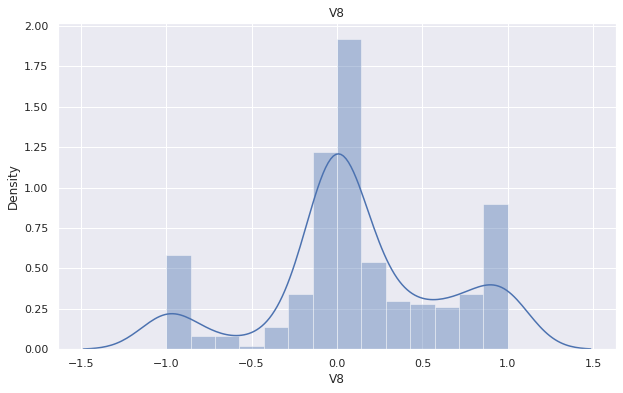

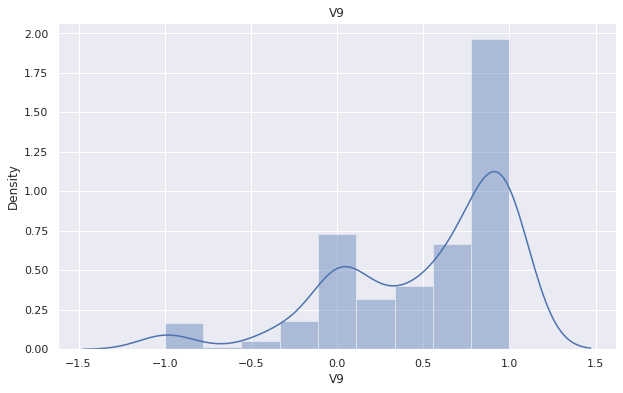

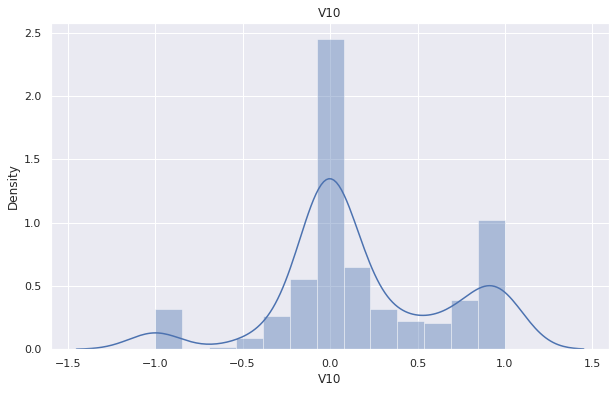

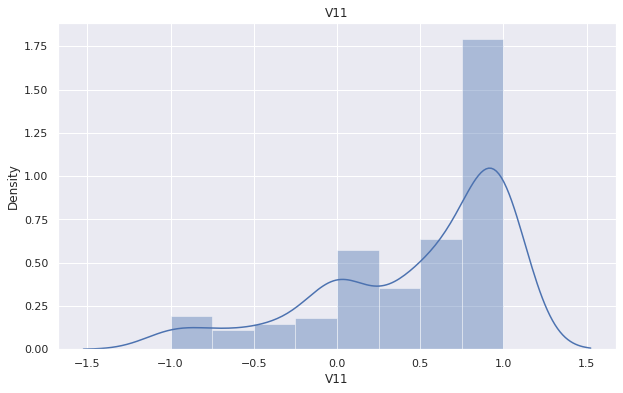

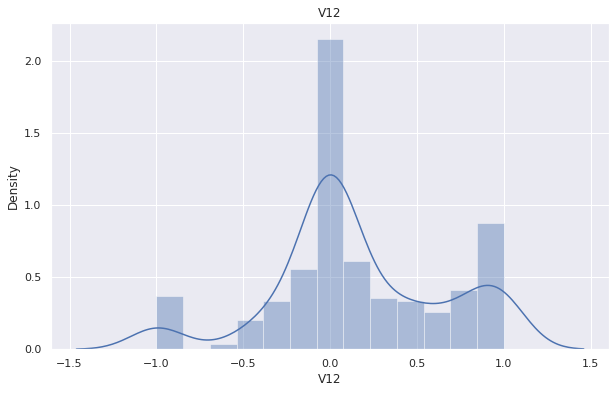

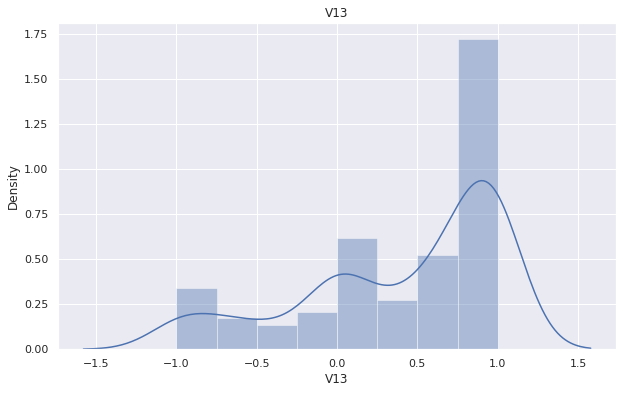

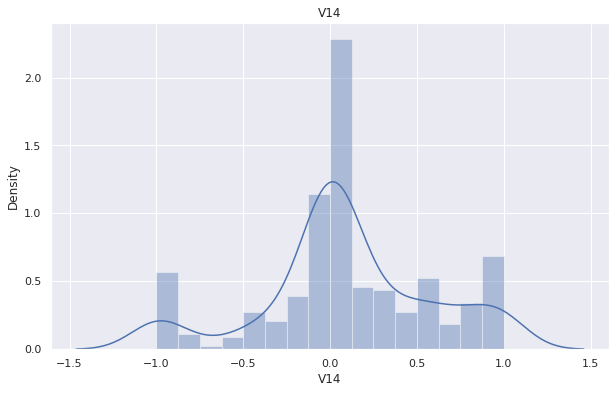

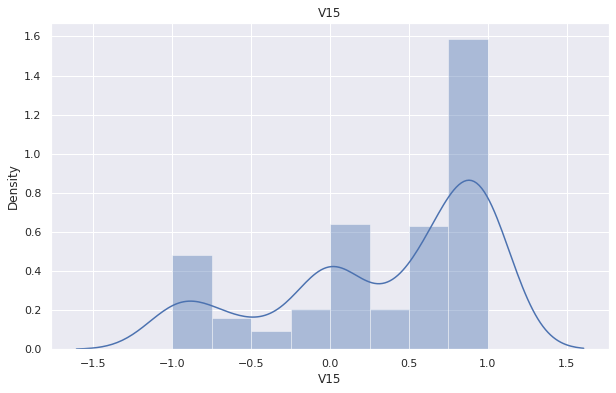

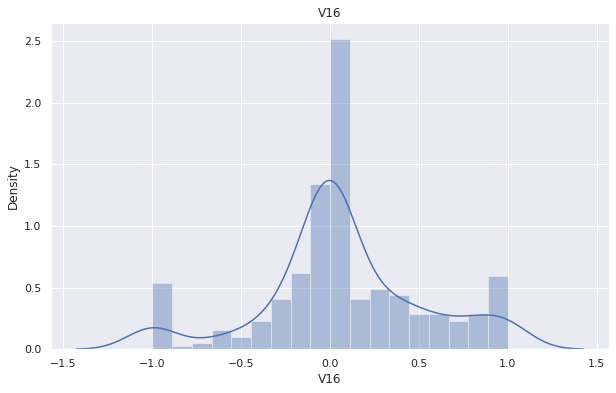

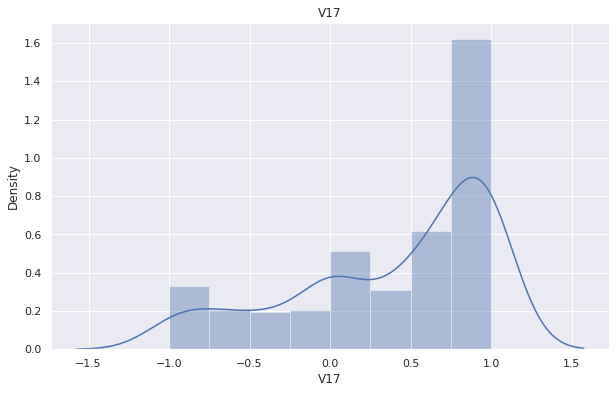

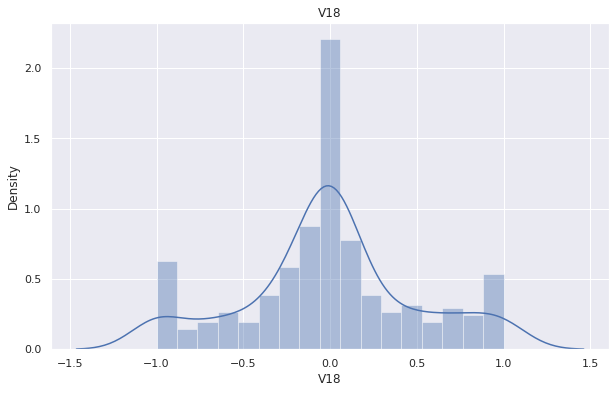

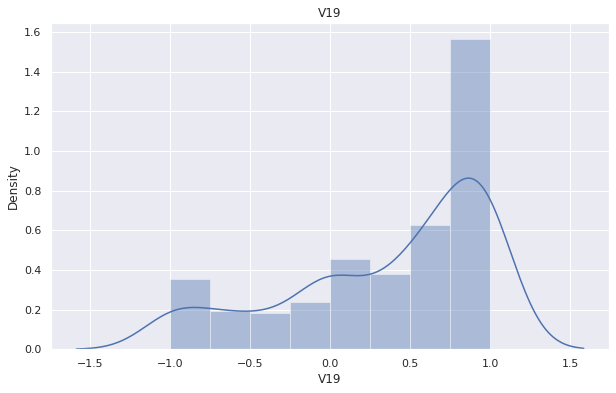

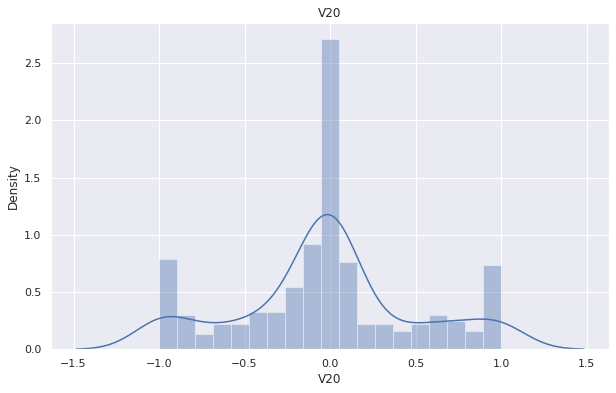

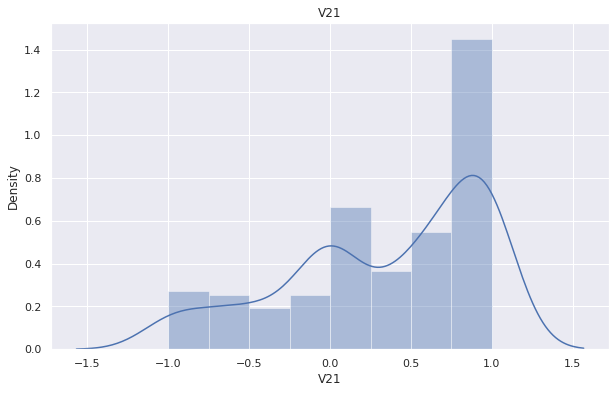

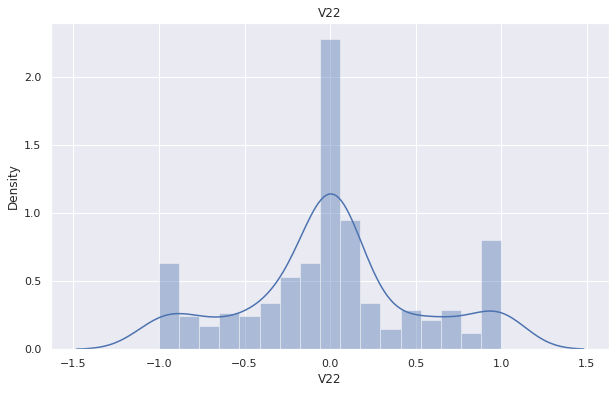

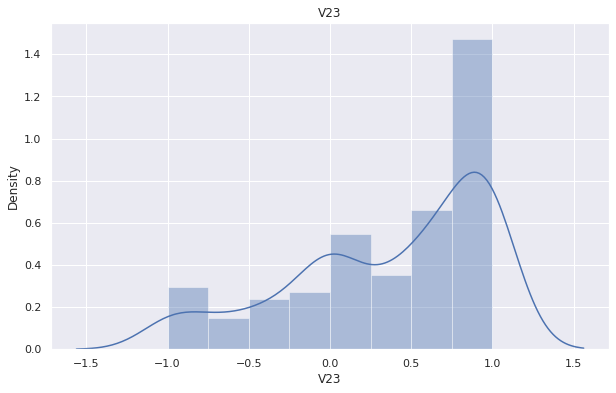

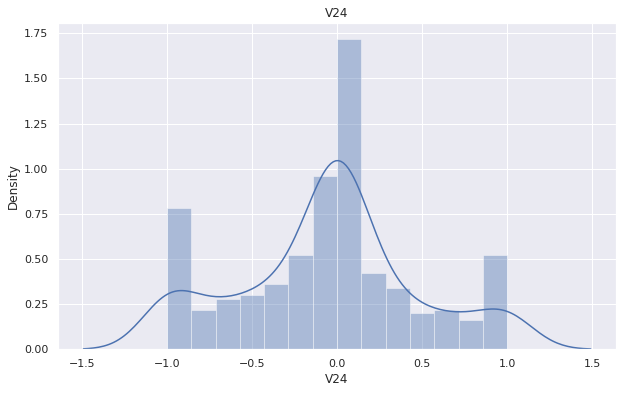

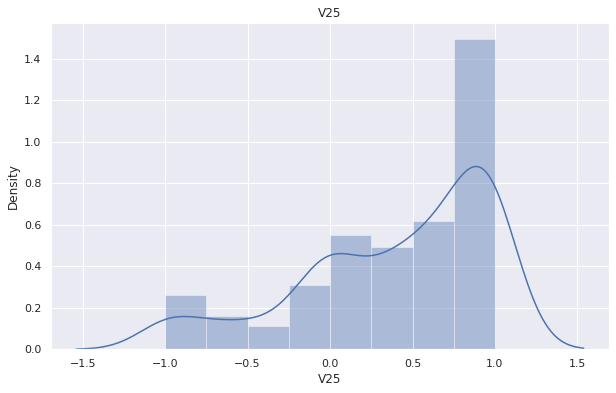

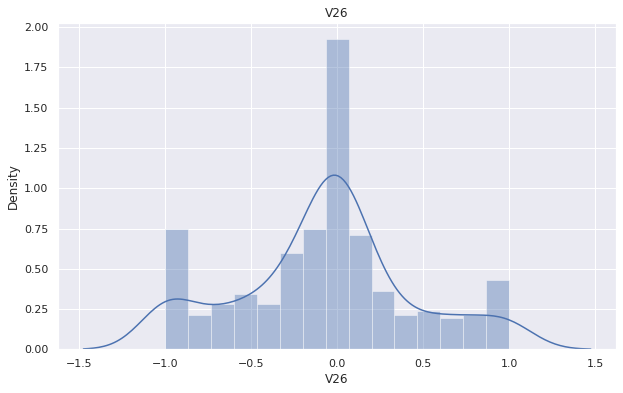

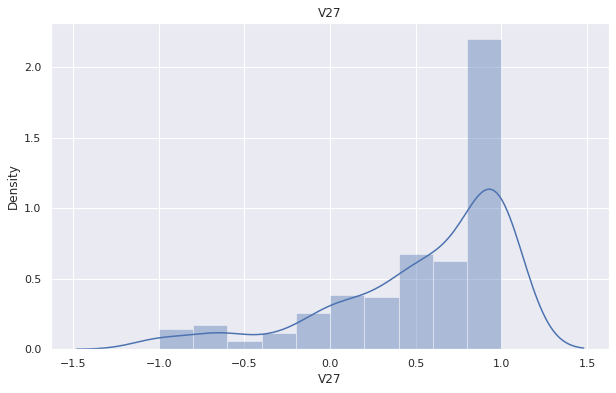

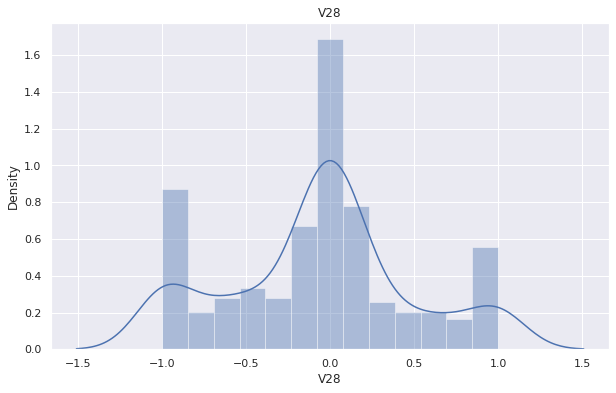

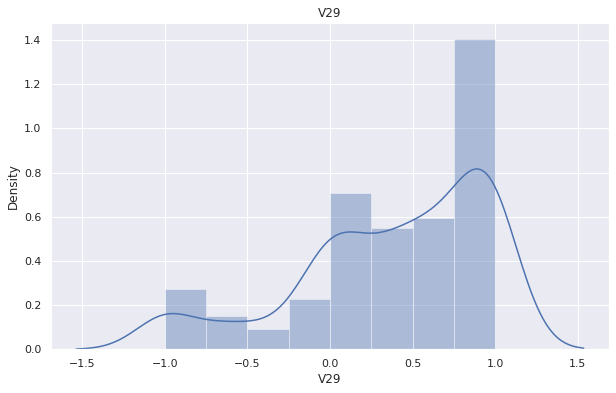

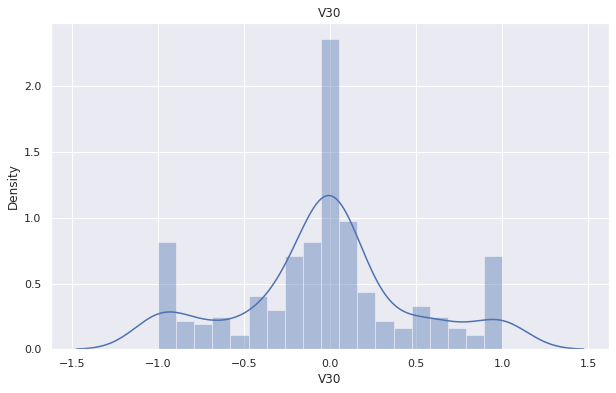

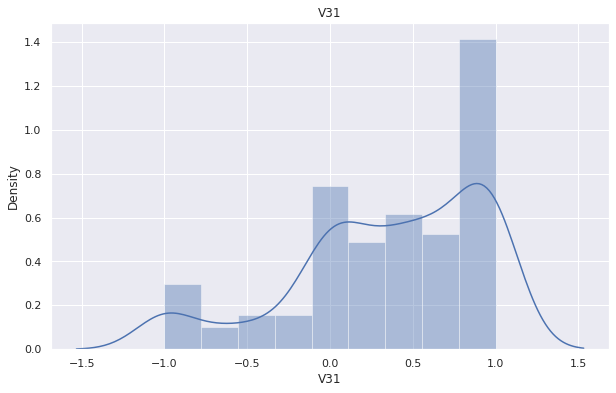

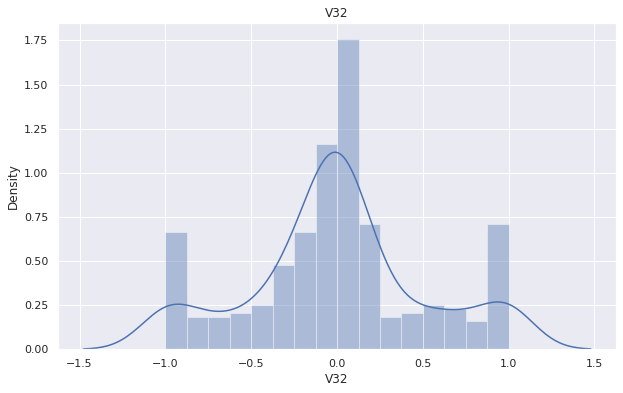

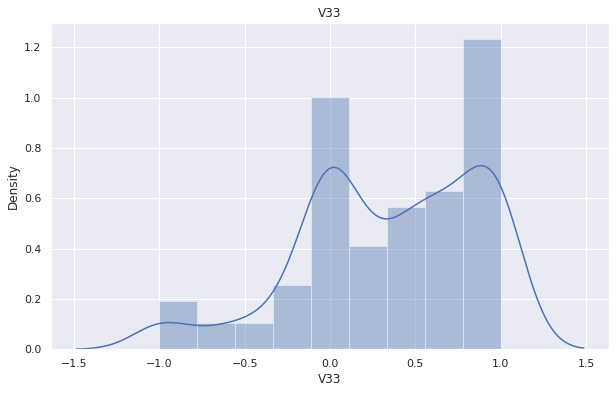

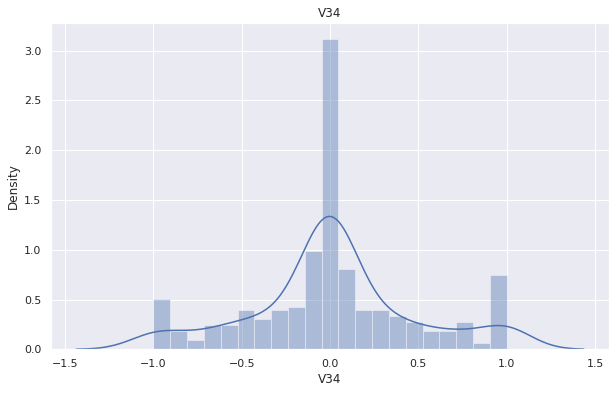

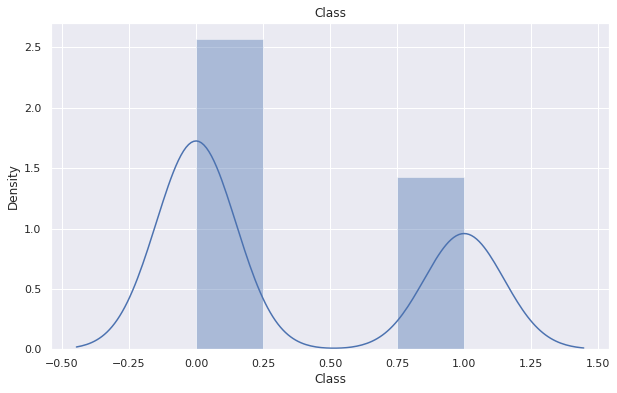

In [19]:
# histogram plot(for checking of skew,gaussian distribution)
histogram=df.copy()
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(histogram[col])
    plt.title(col)
    plt.show()

# FEATURE SELECTION

In [20]:
fs=df.copy()
x=fs.drop("Class",axis=1)
y=fs["Class"]

In [21]:
mutual_info=mutual_info_classif(x,y)
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)*100

V5     30.955
V6     28.794
V21    27.787
V33    27.196
V8     27.074
V27    25.690
V31    25.426
V3     24.949
V23    24.228
V14    23.561
V29    23.355
V7     22.806
V16    22.748
V34    22.551
V22    22.470
V24    21.912
V15    21.621
V32    21.211
V13    20.839
V10    19.166
V28    19.157
V25    19.134
V26    18.744
V4     18.569
V9     18.118
V18    17.534
V17    17.273
V20    17.168
V12    16.531
V11    16.467
V19    15.286
V30    13.186
V1     10.707
dtype: float64

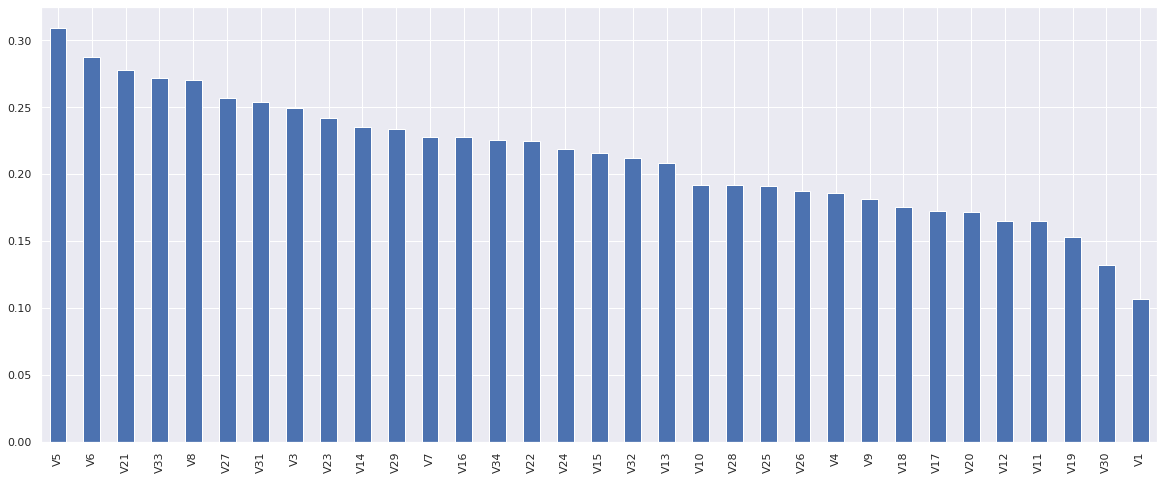

In [22]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

11


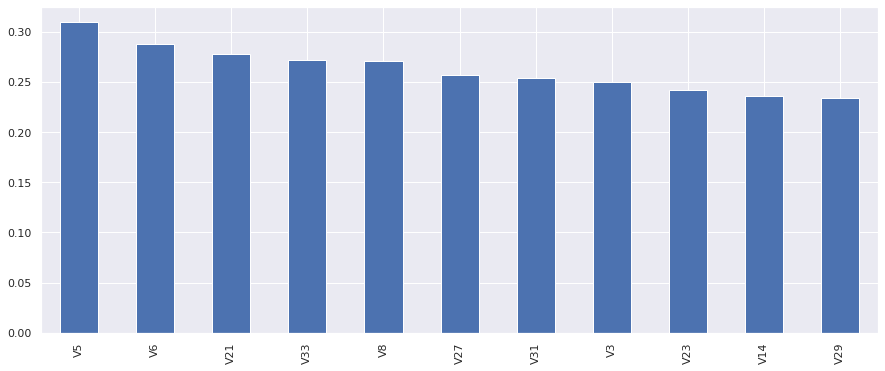

In [23]:
mutual_features=mutual_info.sort_values(ascending=False)[mutual_info.sort_values(ascending=False)>=0.23]
mutual_features.sort_values(ascending=False).plot.bar(figsize=(15,6))
print(len(mutual_features))

In [24]:
mutual_features.index

Index(['V5', 'V6', 'V21', 'V33', 'V8', 'V27', 'V31', 'V3', 'V23', 'V14',
       'V29'],
      dtype='object')

In [25]:
fs=fs[['V5', 'V6', 'V21', 'V33', 'V8', 'V27', 'V31', 'V3', 'V23', 'V14','V29','Class']]
fs.head()

,V5,V6,V21,V33,V8,V27,V31,V3,V23,V14,V29,Class
0,0.852,0.023,0.570,0.186,-0.377,0.411,0.423,0.995,0.369,-0.449,0.213,0.0
1,0.930,-0.362,-0.132,-0.137,-0.936,-0.205,-0.166,1.000,-0.181,-0.697,-0.190,1.0
2,1.000,0.005,0.709,0.560,-0.121,0.590,0.604,1.000,0.434,0.008,0.431,0.0
3,1.000,1.000,-0.700,-0.324,-1.000,0.516,0.257,1.000,0.000,0.000,1.000,1.0
4,0.941,0.065,0.060,-0.046,-0.233,0.133,-0.057,1.000,0.023,-0.007,0.024,0.0


In [26]:
print(fs.info())
fs.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 350
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V5      350 non-null    float64
 1   V6      350 non-null    float64
 2   V21     350 non-null    float64
 3   V33     350 non-null    float64
 4   V8      350 non-null    float64
 5   V27     350 non-null    float64
 6   V31     350 non-null    float64
 7   V3      350 non-null    float64
 8   V23     350 non-null    float64
 9   V14     350 non-null    float64
 10  V29     350 non-null    float64
 11  Class   350 non-null    float64
dtypes: float64(12)
memory usage: 35.5 KB
None


(350, 12)

# VALIDATION DATASET 

In [30]:
# Split-out validation dataset
array = fs.values
X = array[:,0:11]
Y = array[:,11]

validation_size = 0.20
seed = 42
shuffle=True

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed,shuffle=shuffle,stratify=Y)

In [31]:
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

In [32]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((280, 11), (70, 11), (280,), (70,))

In [33]:
df["Class"].value_counts()/len(df)

0.0    0.643
1.0    0.357
Name: Class, dtype: float64

AxesSubplot(0.260833,0.125;0.503333x0.755)


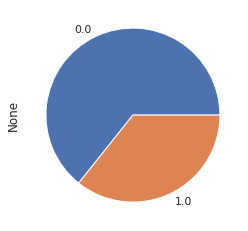

In [34]:
# class distribution
print(df.groupby('Class').size().plot.pie())

In [37]:
models = []

models.append(('Standard-Scaled-ADA', Pipeline([('Scaler', StandardScaler()),('ADA', AdaBoostClassifier())])))
models.append(('Standard-Scaled-GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
models.append(('Standard-Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
models.append(('Standard-Scaled-ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
models.append(('Standard-Scaled-LGBMC', Pipeline([('Scaler', StandardScaler()),('LGBMC', LGBMClassifier())])))
models.append(('Standard-Scaled-XGBC', Pipeline([('Scaler', StandardScaler()),('XGBC', XGBClassifier(verbosity=0))])))
models.append(('Standard-Scaled-Cat', Pipeline([('Scaler', StandardScaler()),('Cat', CatBoostClassifier(verbose=False))])))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



Standard-Scaled-ADA: 0.935714 (0.052489)
Standard-Scaled-GBM: 0.935714 (0.041650)
Standard-Scaled-RF: 0.939286 (0.035892)
Standard-Scaled-ET: 0.942857 (0.036422)
Standard-Scaled-LGBMC: 0.925000 (0.043595)
Standard-Scaled-XGBC: 0.917857 (0.039286)
Standard-Scaled-Cat: 0.935714 (0.041650)


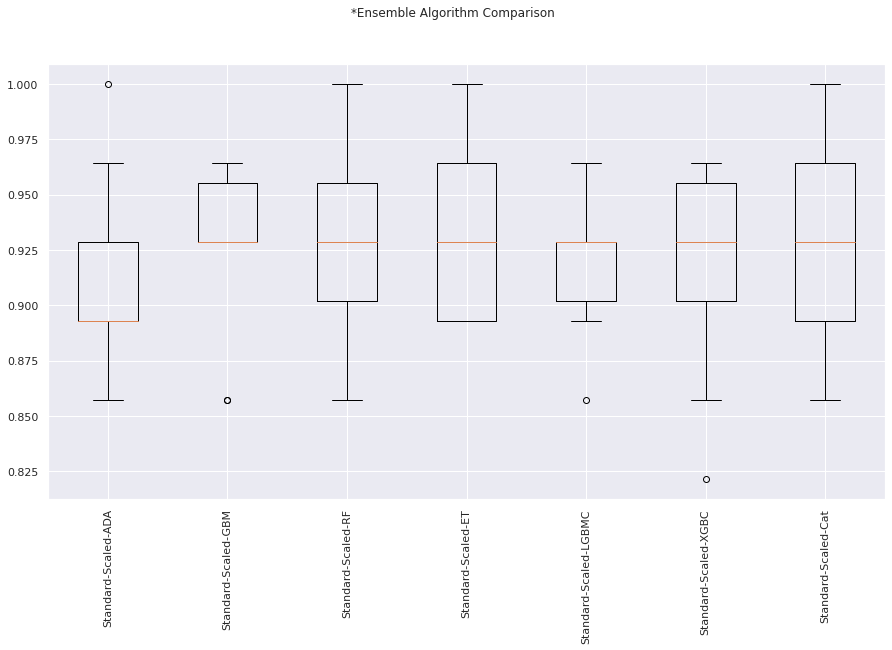

In [36]:
# Compare Algorithms
fig = pyplot.figure(figsize=(15,8))
fig.suptitle('*Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
pyplot.show()

In [38]:
# Tune scaled AdaBoostClassifier()
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,100,150]
learning_rate=[0.1,0.01,0.001,1.0]

param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
model =AdaBoostClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_AdaBoostClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_AdaBoostClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- AdaBoostClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("----------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostClassifier(random_state=seed,**grid_AdaBoostClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- AdaBoostClassifier -------- 
-----------------------------------------------------------
Best: 0.942857 using {'learning_rate': 0.1, 'n_estimators': 150}
----------------------------------
Acuracy score :  0.9571428571428572
----------------------------------
roc_auc_score :  0.9488888888888889
----------------------------------
f1_score :  0.9387755102040817
----------------------------------
precision_score :  0.9583333333333334
----------------------------------
recall :  0.92
----------------------------------
-----Confusion_matrix Report : -----
 
[[44  1]
 [ 2 23]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        45
         1.0       0.96      0.92      0.94        25

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70


In [39]:
# Tune scaled ExtraTreesClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

min_samples_split = [1,2,3,4,5,6,7,8,9]
min_samples_leaf= [2,3,5,7,9]

param_grid = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_ExtraTreesClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_ExtraTreesClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- ExtraTreesClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(random_state=seed,**grid_ExtraTreesClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- ExtraTreesClassifier -------- 
-----------------------------------------------------------
Best: 0.942857 using {'min_samples_leaf': 2, 'min_samples_split': 2}
-----------------------------------------------------------
Acuracy score :  0.9714285714285714
----------------------------------
roc_auc_score :  0.96
----------------------------------
f1_score :  0.9583333333333334
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.92
----------------------------------
-----Confusion_matrix Report : -----
 
[[45  0]
 [ 2 23]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       1.00      0.92      0.96        25

    accuracy                           0.97        70
   macro avg       0.98      0.96      0.97        7

In [40]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,100,150,200,250,300,350,400]
max_depth=[3,5,7,9]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = model = GradientBoostingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_GradientBoostingClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_GradientBoostingClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- GradientBoostingClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(random_state=seed,**grid_GradientBoostingClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- GradientBoostingClassifier -------- 
-----------------------------------------------------------
Best: 0.935714 using {'max_depth': 3, 'n_estimators': 100}
-----------------------------------------------------------
Acuracy score :  0.9142857142857143
----------------------------------
roc_auc_score :  0.88
----------------------------------
f1_score :  0.8636363636363636
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.76
----------------------------------
-----Confusion_matrix Report : -----
 
[[45  0]
 [ 6 19]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        45
         1.0       1.00      0.76      0.86        25

    accuracy                           0.91        70
   macro avg       0.94      0.88      0.90        70
we

In [41]:
# Tune scaled Randomforest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

criterion=['gini','entropy']
min_samples_split = [2,3,4,5,6]
min_samples_leaf= [1,2,3,4]
n_estimators=[10,15,20,25,30]

param_grid = dict(criterion=criterion,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,n_estimators=n_estimators)
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_RandomForestClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_RandomForestClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- RandomForestClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(random_state=seed,**grid_RandomForestClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- RandomForestClassifier -------- 
-----------------------------------------------------------
Best: 0.950000 using {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 25}
-----------------------------------------------------------
Acuracy score :  0.9857142857142858
----------------------------------
roc_auc_score :  0.98
----------------------------------
f1_score :  0.9795918367346939
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.96
----------------------------------
-----Confusion_matrix Report : -----
 
[[45  0]
 [ 1 24]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      0.96      0.98        25

    accuracy                           0.99        70
   macro 

In [42]:
# Tune scaled LGBMClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[25,50,75,100,150,200]
min_child_weight=[0.0001,0.001,0.01,0.1]
param_grid = dict(n_estimators=n_estimators,min_child_weight=min_child_weight)
model = LGBMClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_LGBMClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_LGBMClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- Light GradientBoosting Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LGBMClassifier(random_state=seed,**grid_LGBMClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- Light GradientBoosting Classifier -------- 
-----------------------------------------------------------
Best: 0.939286 using {'min_child_weight': 0.0001, 'n_estimators': 100}
-----------------------------------------------------------
Acuracy score :  0.9571428571428572
----------------------------------
roc_auc_score :  0.94
----------------------------------
f1_score :  0.9361702127659575
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.88
----------------------------------
-----Confusion_matrix Report : -----
 
[[45  0]
 [ 3 22]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        45
         1.0       1.00      0.88      0.94        25

    accuracy                           0.96        70
   macro avg       0.97      0.94    

In [43]:
# Tune scaled XGBClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

learning_rate=[0.1,0.01]
n_estimators=[25,50,75,100,125,150]
max_depth=[3,5,7,9]

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth)
model = XGBClassifier(random_state=seed,verbosity=0)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_XGBClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_XGBClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- Extreme GradientBoosting Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = XGBClassifier(random_state=seed,**grid_XGBClassifier.best_params_,verbosity=0)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- Extreme GradientBoosting Classifier -------- 
-----------------------------------------------------------
Best: 0.939286 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
-----------------------------------------------------------
Acuracy score :  0.9714285714285714
----------------------------------
roc_auc_score :  0.96
----------------------------------
f1_score :  0.9583333333333334
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.92
----------------------------------
-----Confusion_matrix Report : -----
 
[[45  0]
 [ 2 23]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       1.00      0.92      0.96        25

    accuracy                           0.97        70
   macro avg       0.98   

In [44]:
#prevent CatBoostClassifier to throw out error
class CatBoostClassifier(CatBoostClassifier):
    def _get_tags(self):
        return {'pairwise' : False}

In [45]:
# Tune scaled CatBoostClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
learning_rate=[0.1,0.01]
param_grid = dict(learning_rate=learning_rate)
model = CatBoostClassifier(random_state=seed,verbose=False)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_CatBoostClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_CatBoostClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- CatBoost Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = CatBoostClassifier(random_state=seed,**grid_CatBoostClassifier.best_params_,verbose=False)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))

-----------------------------------------------------------
Model : -------- CatBoost Classifier -------- 
-----------------------------------------------------------
Best: 0.932143 using {'learning_rate': 0.1}
-----------------------------------------------------------
Acuracy score :  0.9714285714285714
----------------------------------
roc_auc_score :  0.96
----------------------------------
f1_score :  0.9583333333333334
----------------------------------
precision_score :  1.0
----------------------------------
recall :  0.92
----------------------------------
-----Confusion_matrix Report : -----
 
[[45  0]
 [ 2 23]]
----------------------------------
----- classification_report : -----
 
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        45
         1.0       1.00      0.92      0.96        25

    accuracy                           0.97        70
   macro avg       0.98      0.96      0.97        70
weighted avg       0.97 

In [ ]:
# Tune scaled Randomforest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

criterion=['gini','entropy']
min_samples_split = [1,2,3,4,5,6,7]
min_samples_leaf= [1,2,3,4,5]
n_estimators=[50,100,150,200]
max_depth=[1,3,5,7,9]

param_grid = dict(criterion=criterion,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,n_estimators=n_estimators,max_depth=max_depth)
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_RandomForestClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_RandomForestClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- RandomForestClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(random_state=seed,**grid_RandomForestClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Acuracy score : ",accuracy_score(Y_validation, predictions))
print("----------------------------------")
print("roc_auc_score : ",roc_auc_score(Y_validation,predictions))
print("----------------------------------")
print("f1_score : ",f1_score(Y_validation,predictions))
print("----------------------------------")
print("precision_score : ",precision_score(Y_validation,predictions))
print("----------------------------------")
print("recall : ",recall_score(Y_validation,predictions))
print("----------------------------------")
print("-----Confusion_matrix Report : -----")
print(" ")
print(confusion_matrix(Y_validation, predictions))
print("----------------------------------")
print("----- classification_report : -----")
print(" ")
print(classification_report(Y_validation, predictions))